<a href="https://colab.research.google.com/github/Nikita1013/Machine-Learning-with-Python/blob/master/Project_12_Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work Flow

Data --> Data Preprocessing --> Data Analysis --> Train Test Split --> XGBoost Regressor --> Evaluation

Importing the Dependencies

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Data Collection and Analysis

In [77]:
# loading the dataset from csv file to Pandas Dataframe
big_mart_data = pd.read_csv('/content/BigMartData.csv')

In [78]:
# print the first 5 rows of the dataset
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [79]:
# print the last 5 rows of the dataset
big_mart_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [80]:
# number of columns and rows in the dataframe
big_mart_data.shape

(8523, 12)

In [81]:
# getting some info about the dataframe
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

1. Item-Identifier
2. Item_Fat_Content
3. Item_Type
4. Outlet_Identifier
5. Outlet_Size
6. Outlet_Location_Type
7. Outlet_Type


In [82]:
# checking if there are any missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Handling Missing Values

Mean --> Average Value

Mode --> Most replaced Value

In [83]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [84]:
# filling the missing values in "Item_Weiht column with "Mean" Value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),  inplace = True)  # inplace will replace the values in original dataset

/tmp/ipython-input-4259104965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),  inplace = True)  # inplace will replace the values in original dataset


In [85]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Replacing the missing values in "Outlet_Size" with mode

In [86]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

In [87]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [88]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [89]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [90]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size)

In [91]:
# checking for the missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data Analysis

In [92]:
# statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [93]:
sns.set()

/tmp/ipython-input-2290677747.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


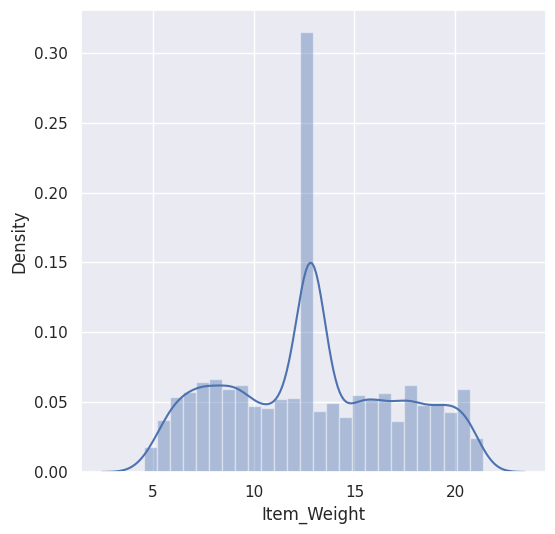

In [94]:
# Item Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

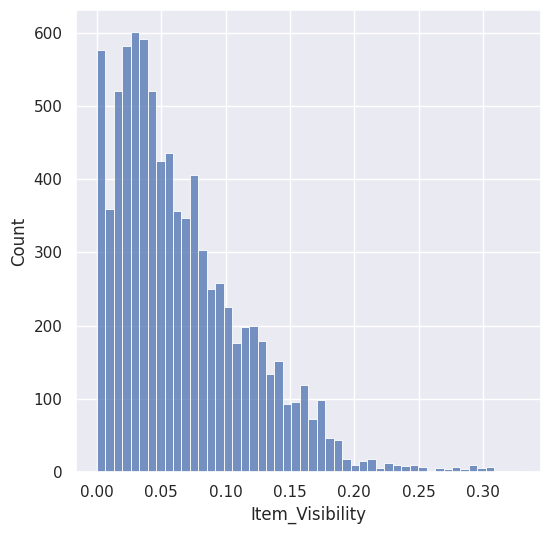

In [95]:
# Item_Visibility Distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Visibility'])
plt.show()

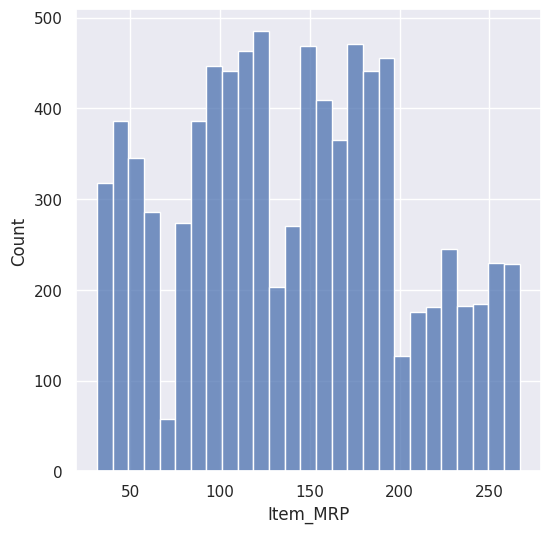

In [96]:
# Item_MRP Distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_MRP'])
plt.show()

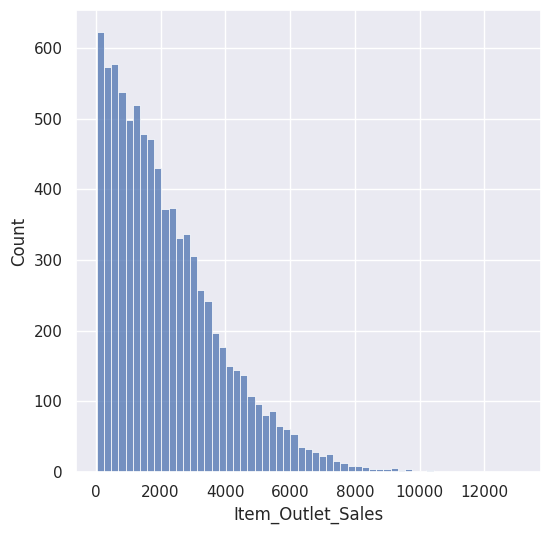

In [97]:
# Item_Outlet_Sales Distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

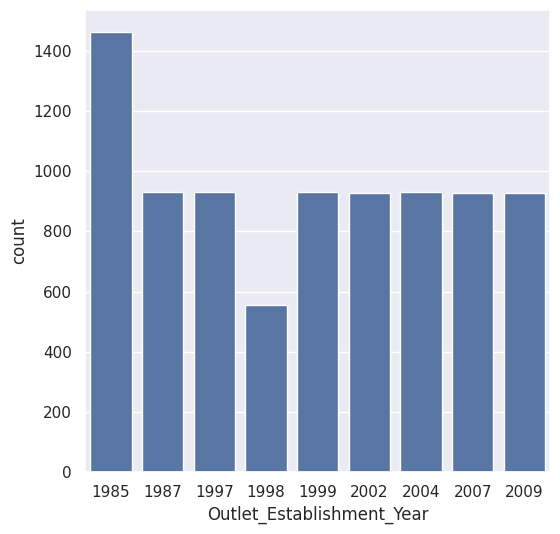

In [98]:
# Outlet_Establishment_Year Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

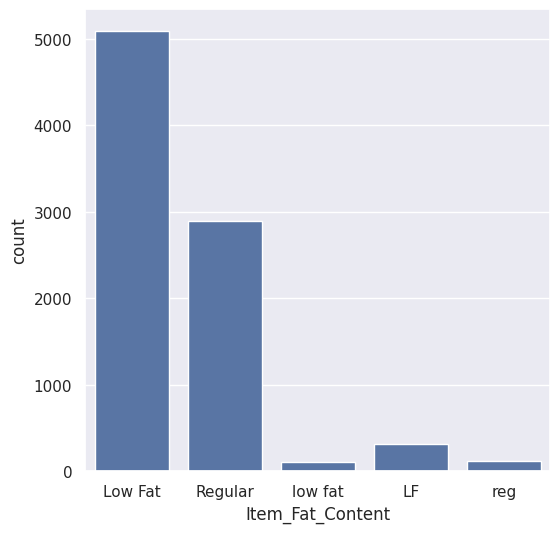

In [99]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

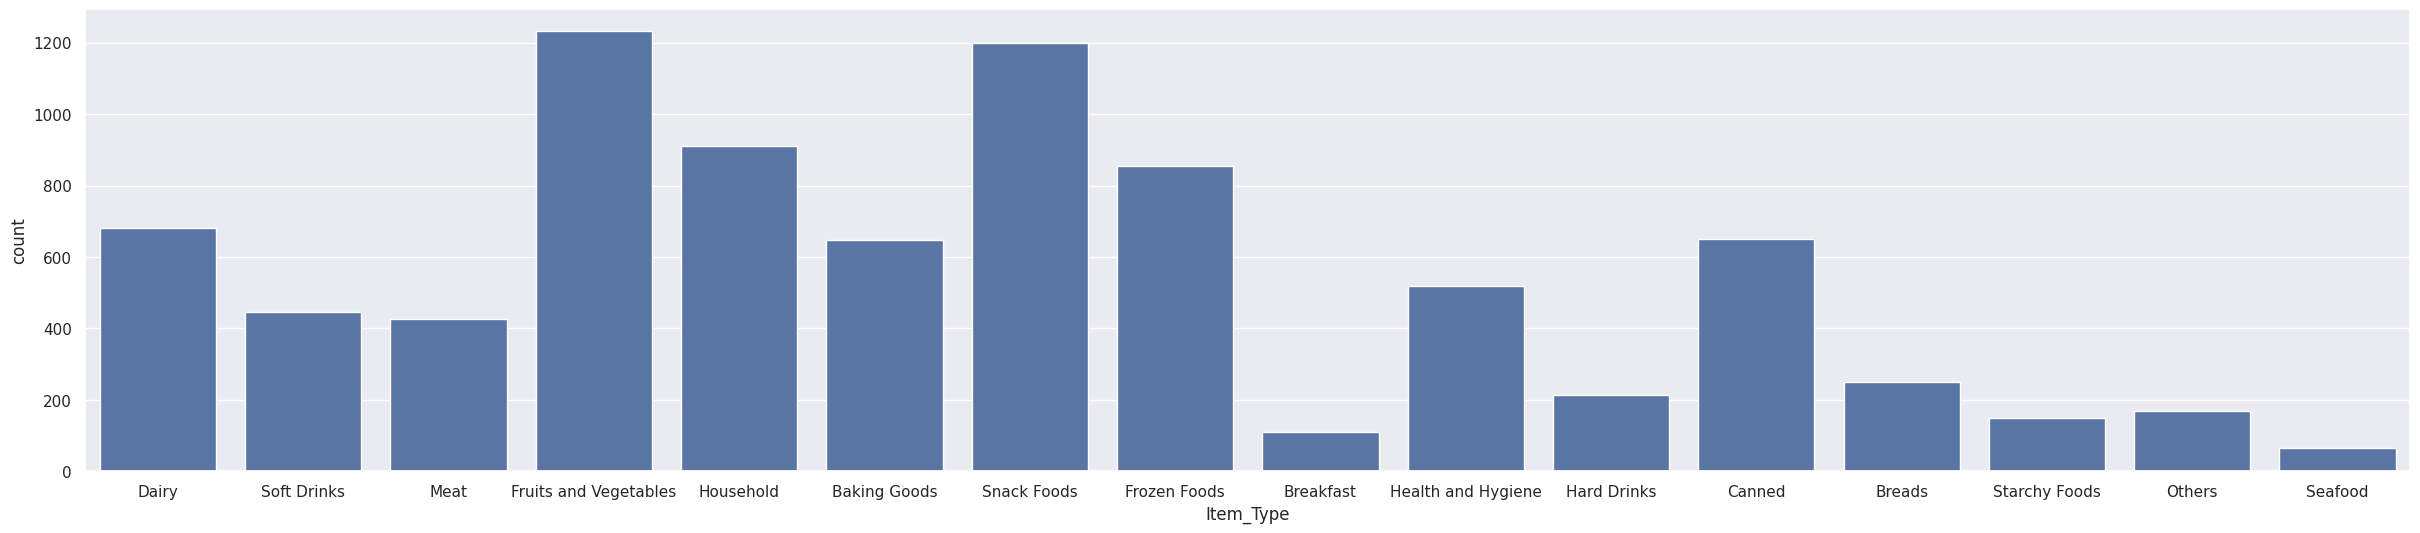

In [100]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

In [101]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 600x600 with 0 Axes>

In [102]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [103]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular' }}, inplace=True)

In [104]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding

In [105]:
encoder = LabelEncoder()

In [108]:
big_mart_data['Item_Identifier']       = encoder.fit_transform(big_mart_data['Item_Identifier'].astype(str))
big_mart_data['Item_Fat_Content']      = encoder.fit_transform(big_mart_data['Item_Fat_Content'].astype(str))
big_mart_data['Item_Type']             = encoder.fit_transform(big_mart_data['Item_Type'].astype(str))
big_mart_data['Outlet_Identifier']     = encoder.fit_transform(big_mart_data['Outlet_Identifier'].astype(str))
big_mart_data['Outlet_Size']           = encoder.fit_transform(big_mart_data['Outlet_Size'].astype(str))
big_mart_data['Outlet_Location_Type']  = encoder.fit_transform(big_mart_data['Outlet_Location_Type'].astype(str))
big_mart_data['Outlet_Type']           = encoder.fit_transform(big_mart_data['Outlet_Type'].astype(str))

In [109]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,623,9.30,0,0.016047,10,249.8092,9,1999,1,0,1,3735.1380
1,1337,5.92,1,0.019278,6,48.2692,3,2009,1,2,2,443.4228
2,1185,17.50,0,0.016760,2,141.6180,9,1999,1,0,1,2097.2700
3,138,19.20,1,0.000000,12,182.0950,0,1998,2,2,0,732.3800
4,332,8.93,0,0.000000,15,53.8614,1,1987,0,2,1,994.7052


Splitting features and target

In [110]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [111]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 623        9.300  ...                     0            1
1                1337        5.920  ...                     2            2
2                1185       17.500  ...                     0            1
3                 138       19.200  ...                     2            0
4                 332        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              861        6.865  ...                     2            1
8519             1445        8.380  ...                     1            1
8520              399       10.600  ...                     1            1
8521             1206        7.210  ...                     2            2
8522             1005       14.800  ...                     0            1

[8523 rows x 11 columns]


In [112]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training Data & Testing Data

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [115]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learninf Model Training

XGBoost Regressor

In [116]:
regressor = XGBRegressor()

In [117]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [118]:
# prediction on training data
training_data_preddiction = regressor.predict(X_train)

In [119]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_preddiction)

In [120]:
print('R sqaured value = ', r2_train)

R sqaured value =  0.876128263612436


In [121]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [122]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [124]:
print('R Squared value = ',r2_test)

R Squared value =  0.5128979415140913
